In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [156]:
data=pd.read_csv(r"C:\Users\vivek\Desktop\GGN AUG2022\my_projects_dse\food delivery\archive (8)\train.csv")
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [158]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


## 1) Data cleaning

In [159]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [160]:
#droping unnecessary columns from data like id 
data.drop('ID',axis=1,inplace=True)

In [161]:
# cleaning the target column of time_taken(mins)
l=[]
for i in range(len(data)):
    a=data['Time_taken(min)'][i]
    b=a.split()[1]
    l.append(int(b))
data['Time_taken(min)']=l

In [162]:
# weather condition cleaning
l=[]
for i in range(len(data)):
    a=data['Weatherconditions'][i]
    b=a.split()[1]
    l.append(b)
data['Weatherconditions']=l

In [163]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45593 non-null  object 
 1   Delivery_person_Age          45593 non-null  object 
 2   Delivery_person_Ratings      45593 non-null  object 
 3   Restaurant_latitude          45593 non-null  float64
 4   Restaurant_longitude         45593 non-null  float64
 5   Delivery_location_latitude   45593 non-null  float64
 6   Delivery_location_longitude  45593 non-null  float64
 7   Order_Date                   45593 non-null  object 
 8   Time_Orderd                  45593 non-null  object 
 9   Time_Order_picked            45593 non-null  object 
 10  Weatherconditions            45593 non-null  object 
 11  Road_traffic_density         45593 non-null  object 
 12  Vehicle_condition            45593 non-null  int64  
 13  Type_of_order   

In [165]:
l=['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries']
for i in l:
    data[i]=data[i].astype('float')

In [166]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


In [167]:
data.Delivery_person_Age.describe()

count    43739.000000
mean        29.567137
std          5.815155
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: Delivery_person_Age, dtype: float64

## 2) Univariate analysis

In [168]:
num_col=data.select_dtypes(include=np.number).columns
cat_col=data.select_dtypes(include=np.object).columns

In [169]:
print(num_col,cat_col)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken(min)'],
      dtype='object') Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


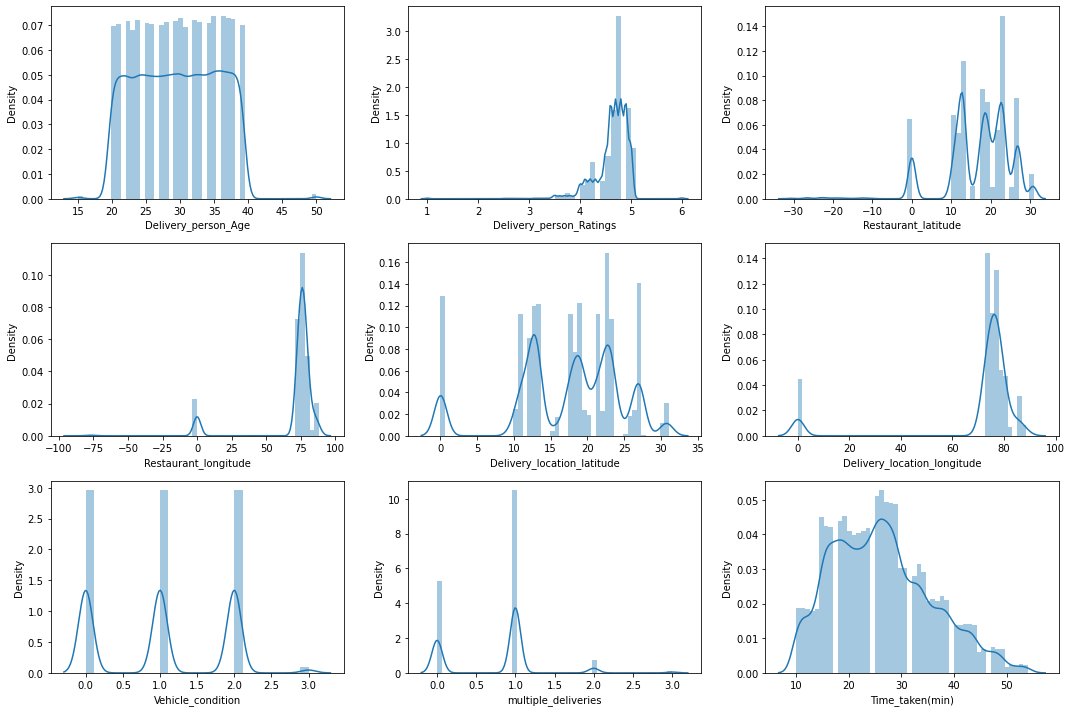

In [170]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(3,3,t)
    sns.distplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [171]:
data.multiple_deliveries.value_counts()

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

insights from univariate analysis
* delivery person age is uniformly distributed between 20 to 40 years
* most of delivery person lies above 4 but an anomoly can be seen in chart having rating above 5.
* by looking the range of delivery location latitude,longitude it seems like location is of india.
* hence one thing can be concluded that resturant coordinates is also of india.
* vehicle condition can be helpful to predict delivery time
* multiple deliveries by delivery agent can also lead to increase in delivery time
* time_taken(target) is positively skewd in nature.

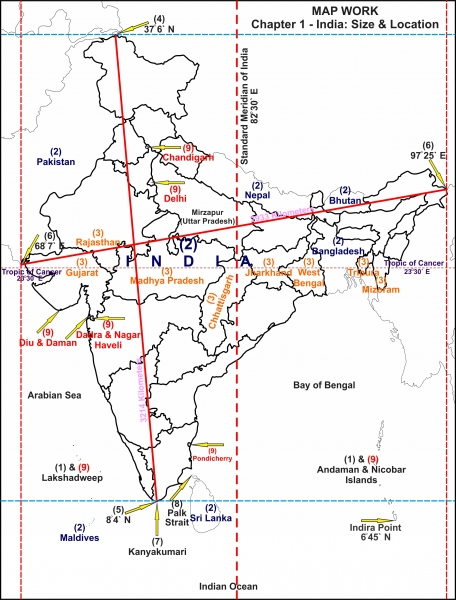

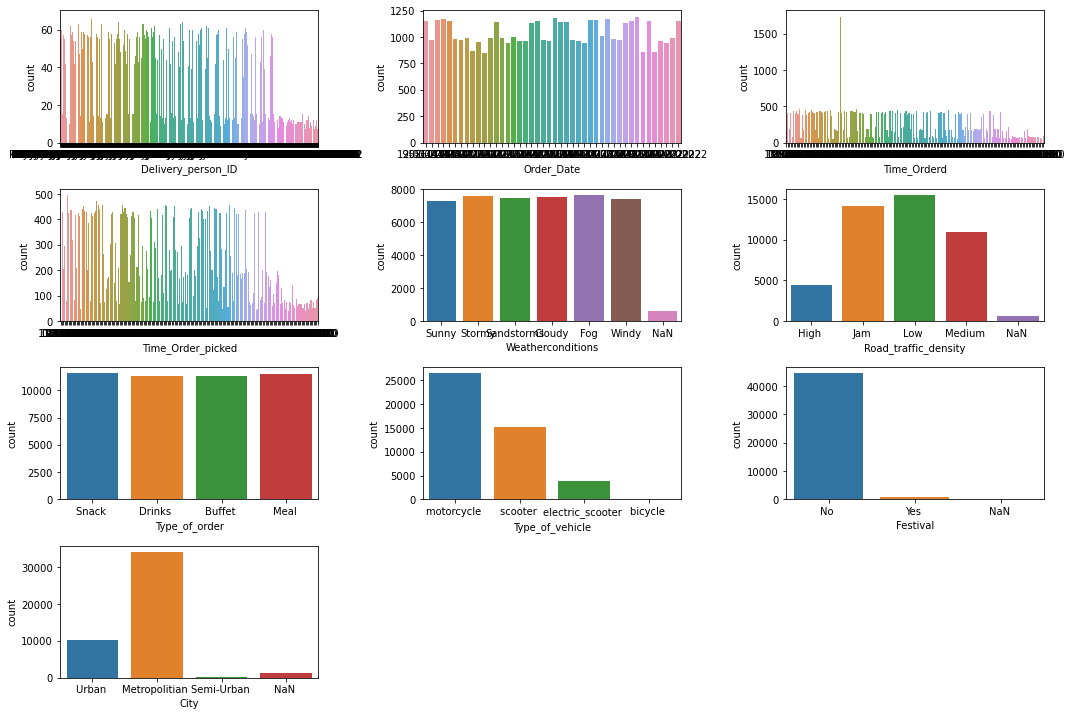

In [172]:
t=1
plt.figure(figsize=(15,10))
for i in cat_col:
    plt.subplot(4,3,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [173]:
data.loc[data['Festival']=='NaN ','Festival']=np.NaN

In [174]:
data.loc[data['City']=='NaN ','City']=np.NaN

In [175]:
data.loc[data.Weatherconditions=='NaN','Weatherconditions']=np.NaN

In [176]:
data.loc[data.Road_traffic_density=='NaN ','Road_traffic_density']=np.NaN

In [177]:
data.loc[data.Time_Orderd=='NaN ','Time_Orderd']=np.NaN

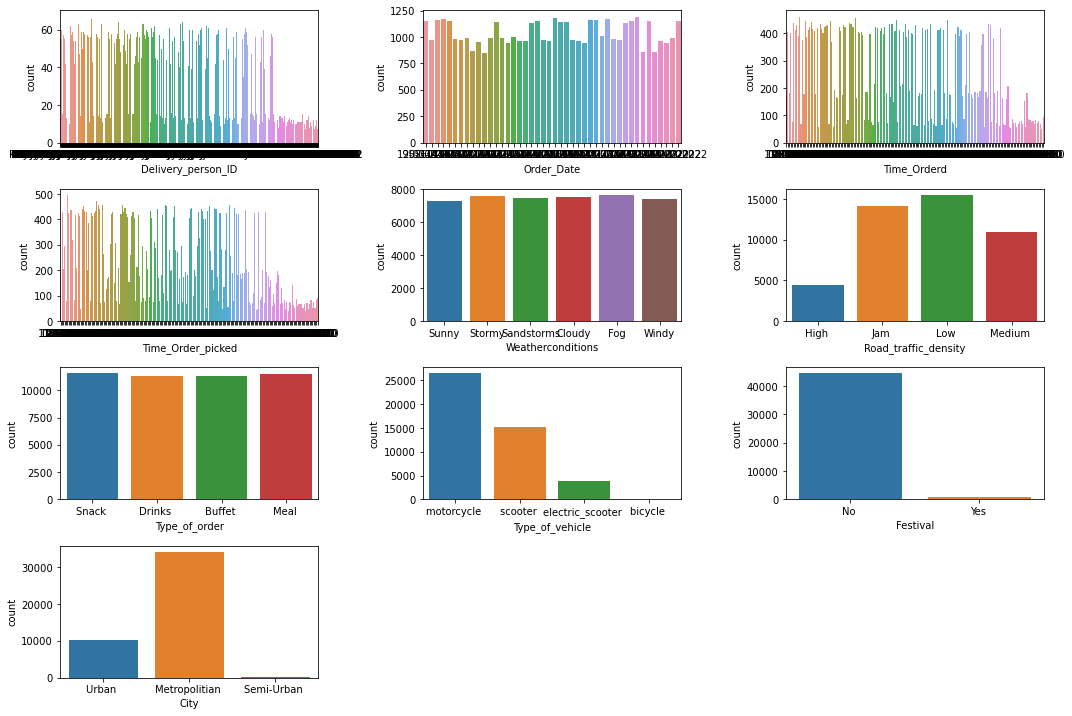

In [178]:
t=1
plt.figure(figsize=(15,10))
for i in cat_col:
    plt.subplot(4,3,t)
    sns.countplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

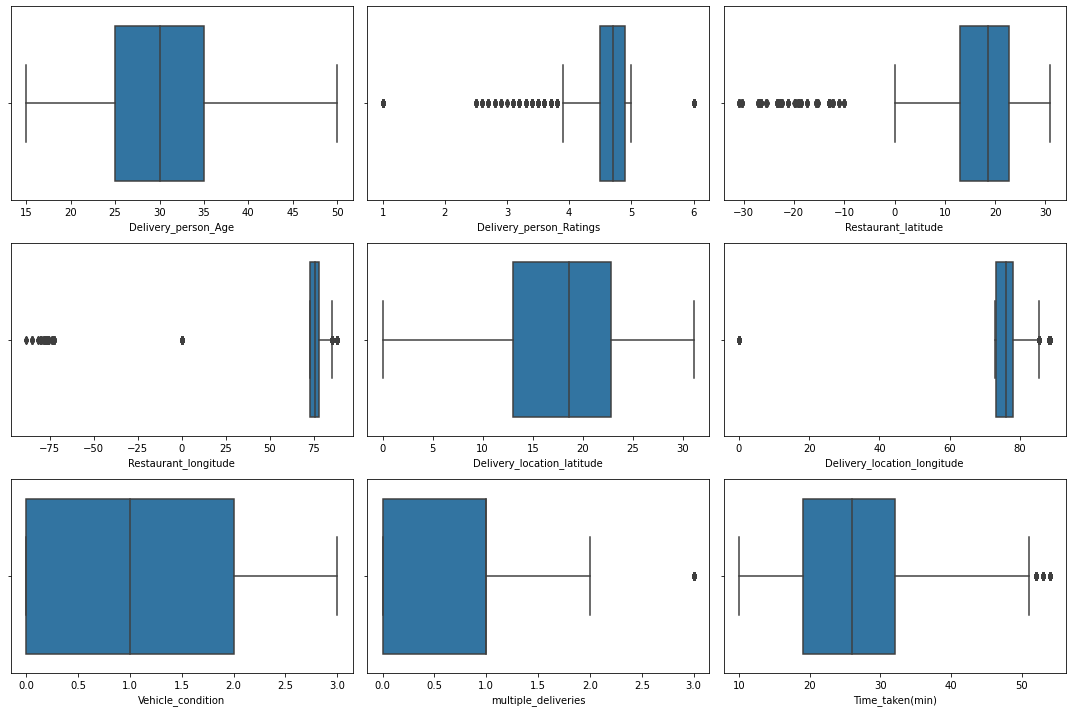

In [179]:
t=1
plt.figure(figsize=(15,10))
for i in num_col:
    plt.subplot(3,3,t)
    sns.boxplot(data[i])
    t=t+1
plt.tight_layout()
plt.show()

In [180]:
data.loc[data.Delivery_person_Ratings>5,'Delivery_person_Ratings']=5

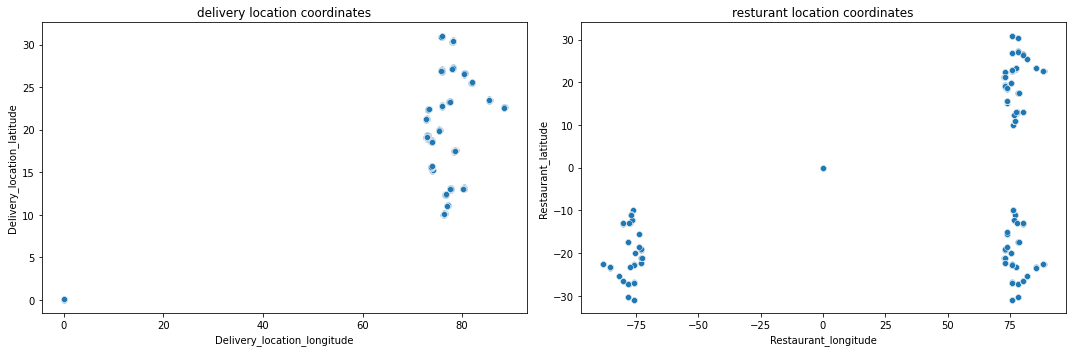

In [181]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data.Delivery_location_longitude,data.Delivery_location_latitude)
plt.title('delivery location coordinates')
plt.subplot(1,2,2)
sns.scatterplot(data.Restaurant_longitude,data.Restaurant_latitude)
plt.title('resturant location coordinates')
plt.tight_layout()
plt.show()

In [182]:
# delivery_location_latitude and longitude are of india so its not possible that location of resturant 
# reside outside india , so we have to correct the coordinate of resturant

In [183]:
data.Restaurant_latitude=np.abs(data.Restaurant_latitude)

In [184]:
data.Restaurant_longitude=np.abs(data.Restaurant_longitude)

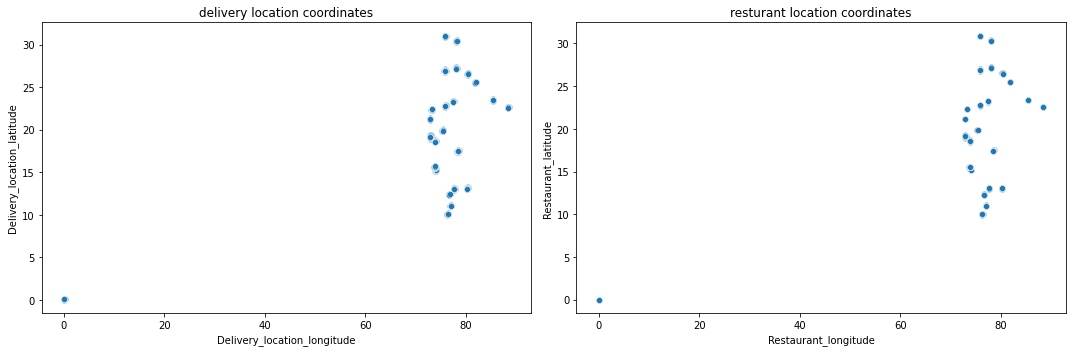

In [185]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data.Delivery_location_longitude,data.Delivery_location_latitude)
plt.title('delivery location coordinates')
plt.subplot(1,2,2)
sns.scatterplot(data.Restaurant_longitude,data.Restaurant_latitude)
plt.title('resturant location coordinates')
plt.tight_layout()
plt.show()

In [186]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43739.0,29.567137,5.815155,15.00,25.000000,30.000000,35.000000,50.000000
Delivery_person_Ratings,43685.0,4.632567,0.331560,1.00,4.500000,4.700000,4.900000,5.000000
Restaurant_latitude,45593.0,17.401571,7.333766,0.00,12.934179,18.554382,22.732225,30.914057
Restaurant_longitude,45593.0,70.782088,21.118611,0.00,73.170283,75.898497,78.046106,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.01,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.01,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.00,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44600.0,0.744664,0.572473,0.00,0.000000,1.000000,1.000000,3.000000
Time_taken(min),45593.0,26.294607,9.383806,10.00,19.000000,26.000000,32.000000,54.000000


In [187]:
data.loc[data.Delivery_location_latitude<5,['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
33,0.0,0.0,0.11,0.11
52,0.0,0.0,0.03,0.03
57,0.0,0.0,0.08,0.08
59,0.0,0.0,0.06,0.06
67,0.0,0.0,0.02,0.02
...,...,...,...,...
45569,0.0,0.0,0.07,0.07
45576,0.0,0.0,0.13,0.13
45577,0.0,0.0,0.09,0.09
45579,0.0,0.0,0.05,0.05


In [188]:
data.loc[data.Delivery_location_latitude<5,['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']]=np.NaN

In [189]:
data['Order_Date']=pd.to_datetime(data.Order_Date,format="%d-%m-%Y")

In [190]:
data.loc[data.Time_Orderd=='nan ',:]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)


## Missing value Treatment

In [191]:
data.isnull().sum()/len(data)

Delivery_person_ID             0.000000
Delivery_person_Age            0.040664
Delivery_person_Ratings        0.041849
Restaurant_latitude            0.079837
Restaurant_longitude           0.079837
Delivery_location_latitude     0.079837
Delivery_location_longitude    0.079837
Order_Date                     0.000000
Time_Orderd                    0.037966
Time_Order_picked              0.000000
Weatherconditions              0.013511
Road_traffic_density           0.013182
Vehicle_condition              0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
multiple_deliveries            0.021780
Festival                       0.005001
City                           0.026320
Time_taken(min)                0.000000
dtype: float64

In [192]:
l1=['Delivery_person_Ratings','Delivery_person_Age',]
l2=['Weatherconditions','Road_traffic_density','multiple_deliveries','Festival','City','Time_Orderd']

In [193]:
for i in l1:
    data.loc[data[i].isnull(),i]=data[i].median()

In [194]:
for i in l2:
    data.loc[data[i].isnull(),i]=data[i].mode()[0]

In [195]:
data.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude            3640
Restaurant_longitude           3640
Delivery_location_latitude     3640
Delivery_location_longitude    3640
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
dtype: int64

In [196]:
l3=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
for i in l3:
    data.loc[data[i].isnull(),i]=data[i].mode()[0]

In [197]:
data.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

## Feature enginnering

### prepration time

In [199]:
from datetime import datetime
# total taken for preparation
l=[]

for i in range(len(data)):
    a=datetime.strptime(data.Time_Order_picked[i],"%H:%M:%S")
    b=datetime.strptime(data.Time_Orderd[i],"%H:%M:%S")
    delta=a-b
    sec=delta.total_seconds()
    mins=sec/60
    l.append(int(mins))
data['preparation_time']=l

In [203]:
data.loc[data.preparation_time>data['Time_taken(min)']]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),preparation_time
39,BANGRES17DEL02,26.0,4.9,12.972532,77.608179,12.992532,77.628179,2022-03-28,08:40:00,08:55:00,Stormy,Low,2,Buffet,scooter,0.0,No,Metropolitian,11,15
108,SURRES09DEL02,27.0,4.7,21.175975,72.795503,21.195975,72.815503,2022-03-15,10:55:00,11:10:00,Sandstorms,Low,2,Snack,scooter,0.0,No,Urban,12,15
140,PUNERES05DEL03,30.0,4.7,18.543626,73.905101,18.573626,73.935101,2022-03-09,21:55:00,23:40:00,Stormy,Low,2,Snack,scooter,0.0,No,Metropolitian,19,105
199,SURRES09DEL02,29.0,5.0,21.175975,72.795503,21.255975,72.875503,2022-03-27,22:35:00,22:50:00,Sandstorms,Low,1,Snack,scooter,1.0,No,Urban,11,15
202,RANCHIRES01DEL02,29.0,4.7,23.416792,85.316842,23.436792,85.336842,2022-03-03,10:30:00,10:45:00,Sandstorms,Low,2,Snack,motorcycle,0.0,No,Metropolitian,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45492,HYDRES18DEL01,25.0,4.8,17.450851,78.379347,17.460851,78.389347,2022-04-01,09:15:00,09:30:00,Cloudy,Low,1,Meal,motorcycle,1.0,No,Metropolitian,13,15
45496,CHENRES09DEL02,37.0,4.9,13.044694,80.261470,13.094694,80.311470,2022-03-26,00:00:00,00:15:00,Sunny,Low,2,Snack,scooter,1.0,No,Metropolitian,12,15
45556,COIMBRES09DEL03,24.0,4.7,11.008638,76.984311,11.068638,77.044311,2022-03-03,22:50:00,23:05:00,Windy,Low,2,Buffet,motorcycle,1.0,No,Metropolitian,12,15
45565,RANCHIRES20DEL01,24.0,4.5,23.399250,85.390464,23.409250,85.400464,2022-04-03,09:15:00,09:30:00,Windy,Low,1,Meal,motorcycle,0.0,No,Urban,10,15


In [ ]:
#this indicates thats our target variable time_taken(min) mainly consist of time required for delivery agent to deliver the 
#food and this does not include prepration time. 
# on the logical point of view delivery time doesnt depend on prepration time

In [207]:
data.drop('preparation_time',axis=1,inplace=True)

In [208]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30


<AxesSubplot:xlabel='Time_taken(min)', ylabel='Density'>

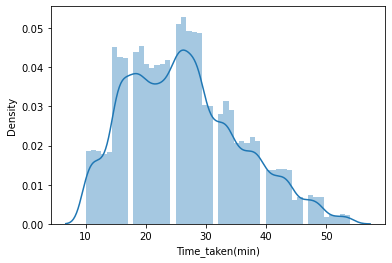

In [210]:
sns.distplot(data['Time_taken(min)'])

In [ ]:
# q1=data.time_taken_preparation.quantile(0.25)
# q3=data.time_taken_preparation.quantile(0.75)
# iqr=q3-q1
# ul=q3+1.5*iqr
# ll=q1-1.5*iqr
# data.loc[data.time_taken_preparation<ll,'time_taken_preparation']

### distance diff km

In [211]:
#distance between resturant and delivery location
import geopy.distance
restaurant_cordinates=data[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates=data[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()


In [ ]:
restaurant_cordinates

In [212]:
data['distance_diff_KM']=np.zeros(len(data))
for i in range(len(data)):
    data['distance_diff_KM'].loc[i]=geopy.distance.geodesic(restaurant_cordinates[i],delivery_location_cordinates[i]).km

In [213]:
geopy.distance.geodesic(restaurant_cordinates[0],delivery_location_cordinates[0])

Distance(3.020736643461066)

### total delivery count

In [214]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_diff_KM
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898


In [215]:
# experinced driver
a=data.Delivery_person_ID.value_counts()
data['total_delivery']=data.Delivery_person_ID.map(a)

In [216]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_diff_KM,total_delivery
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737,62
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737,56
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693,55
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497,61
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898,57


In [217]:
data.rename({'total_delivery':'total_delivery_count'},axis=1,inplace=True)

In [218]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_diff_KM,total_delivery_count
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,...,High,2,Snack,motorcycle,0.0,No,Urban,24,3.020737,62
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,...,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,20.143737,56
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,...,Low,0,Drinks,motorcycle,1.0,No,Urban,26,1.549693,55
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,...,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,7.774497,61
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,...,High,1,Snack,scooter,1.0,No,Metropolitian,30,6.197898,57


## Encoding

In [222]:
scaling_columns=['Delivery_person_Age','Delivery_person_Ratings','distance_diff_KM','total_delivery_count']

In [224]:
data1.drop(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked'],axis=1,inplace=True)

In [228]:
data1
cat_col=data1.select_dtypes(include=np.object).columns

In [229]:
cat_col

Index(['Delivery_person_ID', 'Weatherconditions', 'Road_traffic_density',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')

In [230]:
for i in cat_col:
    print(data1[i].value_counts())

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64
Fog           8270
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weatherconditions, dtype: int64
Low        16078
Jam        14143
Medium     10947
High        4425
Name: Road_traffic_density, dtype: int64
Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64
No      44697
Yes       896
Name: Festival, dtype: int64
Metropolitian     35293
Urban             10136
Semi-Urban          164
Name: City, dtype: int64


In [232]:
### frequency encoding for delivery person id 
encoding=data1.Delivery_person_ID.value_counts()/len(data1)
data1['delivery_person_id']=data1.Delivery_person_ID.map(encoding)

In [236]:
### target encoding for weather conding 
encoding=data1.groupby('Weatherconditions')['Time_taken(min)'].mean()
data1['Weatherconditions']=data1['Weatherconditions'].map(encoding)

In [239]:
### target encoding for Road_traffic_density
encoding=data1.groupby('Road_traffic_density')['Time_taken(min)'].mean()
data1['Road_traffic_density']=data1['Road_traffic_density'].map(encoding)


In [241]:
### target encoding for type of order
encoding=data1.groupby('Type_of_order')['Time_taken(min)'].mean()
data1['Type_of_order']=data1['Type_of_order'].map(encoding)


In [243]:
### frequency encodning for Type_of_vehicle	
encoding=data1.Type_of_vehicle.value_counts()/len(data1)
data1['Type_of_vehicle']=data1.Type_of_vehicle.map(encoding)

In [247]:
### dummies for festival
data1['Festival']=pd.get_dummies(data1.Festival,drop_first=True)

In [251]:
### frequency enconding for City
encoding=data1.City.value_counts()/len(data1)
data1['City']=data1.City.map(encoding)

In [253]:
data1.drop('Delivery_person_ID',axis=1,inplace=True)

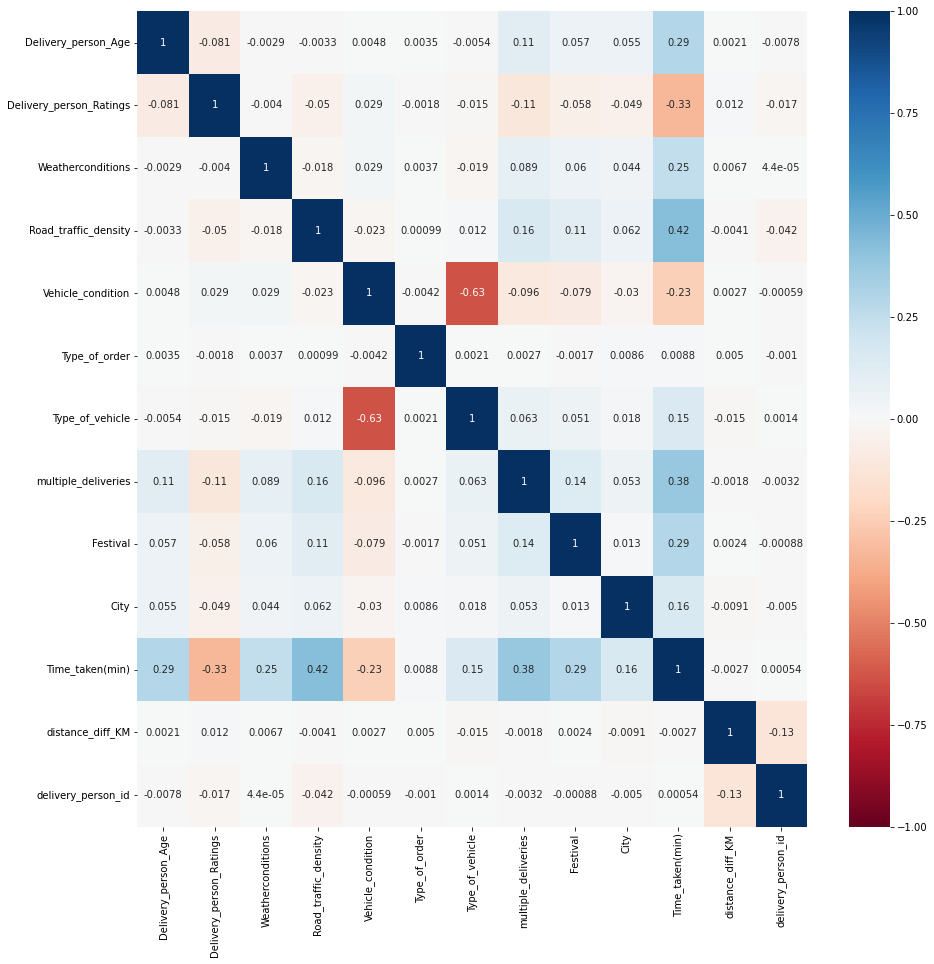

In [287]:
plt.figure(figsize=[15,15])
sns.heatmap(data1.corr(),vmax=1,vmin=-1,annot=True,cmap='RdBu')
plt.show()

In [261]:
data1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_diff_KM,total_delivery_count,delivery_person_id
0,37.0,4.9,21.856947,27.240000,2,26.286309,0.579804,0.0,0,0.222315,24,3.020737,62,0.001360
1,34.0,4.5,25.870815,31.176624,2,26.286309,0.335051,1.0,0,0.774088,33,20.143737,56,0.001228
2,23.0,4.4,25.875517,21.464175,0,26.187953,0.579804,1.0,0,0.222315,26,1.549693,55,0.001206
3,38.0,4.7,21.856947,26.699644,0,26.283511,0.579804,1.0,0,0.774088,21,7.774497,61,0.001338
4,32.0,4.6,28.917330,27.240000,1,26.286309,0.335051,1.0,0,0.774088,30,6.197898,57,0.001250


In [280]:
data1.drop('total_delivery_count',axis=1,inplace=True)

## Machine Learning model

In [281]:
from sklearn.model_selection import train_test_split

In [282]:
X=data1.drop('Time_taken(min)',axis=1)
y=data1['Time_taken(min)']

In [283]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [293]:
scaling_columns=['Delivery_person_Age',
 'Delivery_person_Ratings',
 'distance_diff_KM',]

In [294]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in scaling_columns:
    xtrain.loc[:,i]=ss.fit_transform(pd.DataFrame(xtrain.loc[:,i]))
    xtest.loc[:,i]=ss.fit_transform(pd.DataFrame(xtest.loc[:,i]))


In [295]:
import statsmodels.api as sma
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Base model- linear regression

In [296]:
xtrain=sma.add_constant(xtrain)
xtest=sma.add_constant(xtest)

In [301]:
linear_regression=sma.OLS(ytrain,xtrain).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Time_taken(min)   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     3594.
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:05:23   Log-Likelihood:            -1.1921e+05
No. Observations:               36474   AIC:                         2.384e+05
Df Residuals:                   36461   BIC:                         2.386e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -34.8032     10.651     -3.268      0.001     -55.680     -13.927
Delivery_person_Age         2.2443      0.034     66.651      0.000       2.178       2.310
Delivery_person_Ratings    -2.3886      0.034    -70.928      0.000      -2.455      -2.323
Weatherconditions           0.9230      0.014     64.171      0.000       0.895       0.951
Road_traffic_density        0.8485      0.009     98.967      0.000       0.832       0.865
Vehicle_condition          -2.1055      0.052    -40.700      0.000      -2.207      -2.004
Type_of_order               0.4319      0.405      1.067      0.286      -0.361       1.225
Type_of_vehicle             0.3417      0.269      1.268      0.205      -0.186       0.870
multiple_deliveries         3.2926      0.061     53.940      0.000       3.173       3.412
Festival                   10.9746      0.246     44.657      0.000      10.493      11.456
City                        3.2337      0.144     22.475      0.000       2.952       3.516
distance_diff_KM            0.0801      0.034      2.388      0.017       0.014       0.146
delivery_person_id        358.4155     91.942      3.898      0.000     178.206     538.625
==============================================================================
Omnibus:                      671.926   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              729.889
Skew:                           0.313   Prob(JB):                    3.21e-159
Kurtosis:                       3.296   Cond. No.                     1.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
def validate(pred,actual):
    print('rmse',mean_squared_error(actual,pred))
    print('r2_square',r2_score(actual,pred))

In [306]:
validate(linear_regression.predict(xtest),ytest)

rmse 39.777244880990985
r2_square 0.5452063890133916


### Decision tree

In [307]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 44.06217787038052
r2_square 0.4962145557954154


### Random forest

In [313]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=500)
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 29.828575380787974
r2_square 0.6589546222066842


### Adaboost

In [309]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 38.94448376769832
r2_square 0.554727773285649


### Xgboost

In [311]:
from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
validate(pred,ytest)

rmse 30.386360433323944
r2_square 0.6525771800546156


In [ ]:
## hence random forest works fine on above dataset having r2_square about 65%